In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Instalar plotly y nbformat: pip install plotly nbformat

# 1. Selección de variables clave

## a. Examinen el conjunto de datos proporcionado. 
El conjunto de datos contiene información detallada sobre transacciones realizadas en una cadena de tiendas de conveniencia. Entre las columnas se incluyen datos como el producto vendido, género del cliente, método de pago, fecha, hora, monto total, entre otros.

In [9]:
df = pd.read_csv('data.csv')
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


Columnas relevantes detectadas:

- 'Product line'

- 'Date'

- 'Gender'

- 'Payment'

- 'Total', 'Quantity', 'Unit price'

## b. Variables seleccionadas y justificación
A continuación se detallan las variables seleccionadas y su importancia para el análisis del comportamiento de ventas y clientes:
| Variable             | Justificación                                                                                                                            |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `Product line`       | Permite identificar qué categorías de productos son más vendidas. Es esencial para segmentar el análisis por tipo de producto.           |
| `Month`              | Derivada de `Date` **(ver código más adelante)**, esta variable permite observar tendencias mensuales y detectar patrones de comportamiento en el tiempo.              |
| `Gender`             | Permite analizar diferencias de comportamiento entre hombres y mujeres, útil para estrategias de marketing diferenciadas.                |
| `Payment`            | Permite conocer las preferencias de método de pago de los clientes. Es útil para adaptar sistemas de cobro y promociones.                |
| `Quantity` y `Total` | Representan el volumen de ventas y el ingreso total por transacción. Son variables cuantitativas centrales en el análisis financiero.    |
| `Unit price`         | Relacionada con el valor individual de los productos, permite analizar si productos más caros tienen menor o mayor frecuencia de compra. |


In [10]:
# Convertir la columna 'Date' a tipo datetime y extraer el mes
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

pivot = df.pivot_table(
    index=['Product line', 'Month'],
    columns='Gender',
    values=None,
    aggfunc='size'
)

# Calcular la diferencia de compras entre géneros
pivot['Diff_Female_Male'] = pivot['Female'] - pivot['Male']

# Identificar los productos donde las mujeres compran más
mas_femenino = abs(pivot[pivot['Diff_Female_Male'] > 0])

# Identificar los productos donde los hombres compran más
mas_masculino = abs(pivot[pivot['Diff_Female_Male'] < 0])

print("Productos más comprados por mujeres:")
display(mas_femenino)

print("Productos más comprados por hombres:")
display(mas_masculino)

Productos más comprados por mujeres:


Gender                          Female  Male  Diff_Female_Male
Product line           Month                                  
Electronic accessories 2019-02      31    23                 8
Fashion accessories    2019-01      36    28                 8
                       2019-02      32    28                 4
                       2019-03      28    26                 2
Food and beverages     2019-02      34    28                 6
                       2019-03      30    26                 4
Health and beauty      2019-02      24    22                 2
Home and lifestyle     2019-01      32    27                 5
Sports and travel      2019-01      38    32                 6
                       2019-02      27    16                11

Productos más comprados por hombres:


Gender                          Female  Male  Diff_Female_Male
Product line           Month                                  
Electronic accessories 2019-01      23    31                 8
                       2019-03      30    32                 2
Food and beverages     2019-01      26    30                 4
Health and beauty      2019-01      21    28                 7
                       2019-03      19    38                19
Home and lifestyle     2019-02      16    22                 6
                       2019-03      31    32                 1
Sports and travel      2019-03      23    30                 7

In [11]:
pivot_pago = df.pivot_table(
    index=['Product line', 'Month', 'Payment'],
    columns='Gender',
    values=None,
    aggfunc='size'
)

pivot_pago

Gender                                      Female  Male
Product line           Month   Payment                  
Electronic accessories 2019-01 Cash              9    10
                               Credit card       7     8
                               Ewallet           7    13
                       2019-02 Cash             17     8
                               Credit card       7     8
                               Ewallet           7     7
                       2019-03 Cash             12    15
                               Credit card      12     4
                               Ewallet           6    13
Fashion accessories    2019-01 Cash             12     7
                               Credit card      11     9
                               Ewallet          13    12
                       2019-02 Cash             11    11
                               Credit card       9     7
                               Ewallet          12    10
                       2019-03 Cash              5    11
                               Credit card      13     7
                               Ewallet          10     8
Food and beverages     2019-01 Cash             12    10
                               Credit card       8    12
                               Ewallet           6     8
                       2019-02 Cash             11     8
                               Credit card      14    10
                               Ewallet           9    10
                       2019-03 Cash             10     6
                               Credit card       9     8
                               Ewallet          11    12
Health and beauty      2019-01 Cash              6     8
                               Credit card       7    10
                               Ewallet           8    10
                       2019-02 Cash             10     5
                               Credit card       6     7
                               Ewallet           8    10
                       2019-03 Cash              6    14
                               Credit card       6    14
                               Ewallet           7    10
Home and lifestyle     2019-01 Cash             12     8
                               Credit card      11     6
                               Ewallet           9    13
                       2019-02 Cash              5     9
                               Credit card       8     2
                               Ewallet           3    11
                       2019-03 Cash              7    10
                               Credit card       7    11
                               Ewallet          17    11
Sports and travel      2019-01 Cash             17    11
                               Credit card      13    11
                               Ewallet           8    10
                       2019-02 Cash             10     7
                               Credit card       6     6
                               Ewallet          11     3
                       2019-03 Cash              6     8
                               Credit card       9     8
                               Ewallet           8    14

## Conclusión 1
Estas variables nos permiten hacer un análisis integral del comportamiento del cliente en función del tipo de producto, género, fecha y forma de pago. Además, aportan valor para la toma de decisiones comerciales, como promociones dirigidas, gestión de stock y preferencia de canales de pago.

In [12]:
df.pivot_table(
    index=['Product line', 'Month'],
    values=['Quantity', 'Unit price', 'Total'],
    aggfunc={'Quantity': 'sum',  # Suma de cantidades
             'Unit price': 'mean', # Promedio de precios unitarios
             'Total': 'sum'} # Suma de totales
)


Quantity       Total  Unit price
Product line           Month                                    
Electronic accessories 2019-01       333  18831.2880   54.633519
                       2019-02       313  17362.9050   54.424815
                       2019-03       325  18143.3385   51.848710
Fashion accessories    2019-01       336  19345.1160   55.369531
                       2019-02       295  19009.8615   61.948167
                       2019-03       271  15950.9175   53.940926
Food and beverages     2019-01       325  19570.5300   57.810357
                       2019-02       349  20000.3580   54.322419
                       2019-03       278  16573.9560   56.074464
Health and beauty      2019-01       254  16383.1710   58.322653
                       2019-02       266  14602.2555   54.050870
                       2019-03       334  18208.3125   52.521579
Home and lifestyle     2019-01       342  20494.7400   56.560847
                       2019-02       205  12434.3835   55.265263
                       2019-03       364  20932.7895   54.183175
Sports and travel      2019-01       375  21667.0230   54.682143
                       2019-02       226  13809.6105   59.285581
                       2019-03       319  19646.1930   58.185849

# 2. Visualización básica de datos: 

## a. Gráficos básicos generados

### 1. Gráfico de líneas: Total de ventas por mes y tipo de producto
**Para que sirve**: Este gráfico permite analizar la evolución temporal del rendimiento de cada línea de producto. Es útil para detectar tendencias, estacionalidades o cambios en el comportamiento del cliente a lo largo del tiempo.

**Que nos muestra**: 
- Productos como Home and lifestyle y Sports and travel tuvieron picos de ventas en marzo.

- Food and beverages mantuvo un rendimiento estable durante los tres meses.

- Algunos productos como Health and beauty presentan subidas o bajadas que pueden estar relacionadas con campañas, temporadas o comportamiento del consumidor.



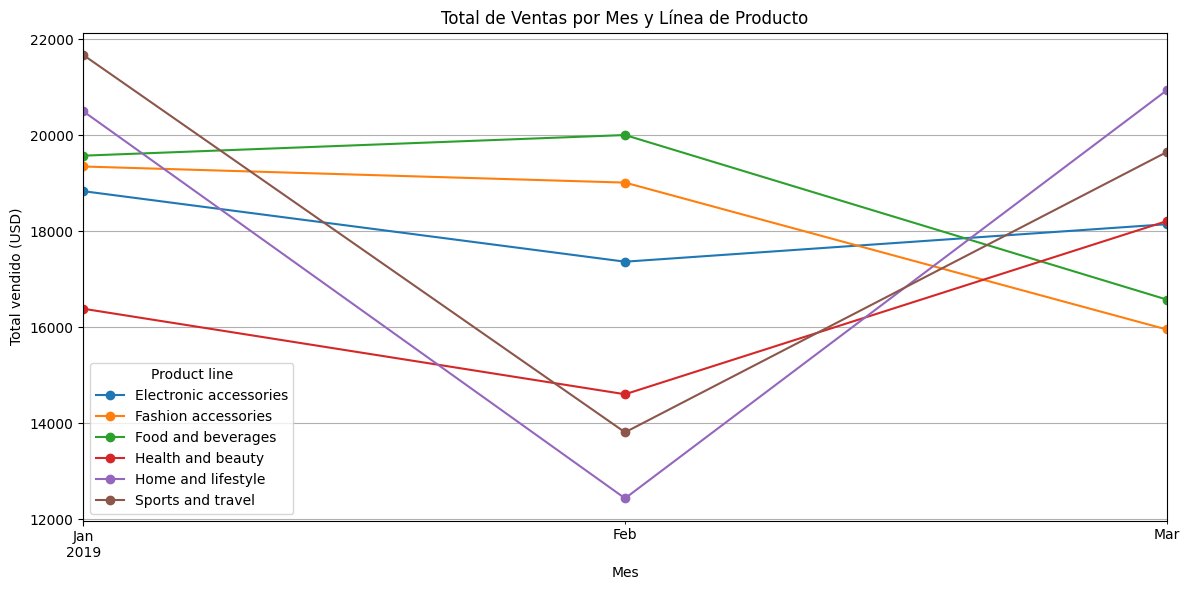

In [13]:
pivot_total = df.pivot_table(
    index='Month',
    columns='Product line',
    values='Total',
    aggfunc='sum'
)

pivot_total.plot(marker='o', figsize=(12,6))
plt.title('Total de Ventas por Mes y Línea de Producto')
plt.ylabel('Total vendido (USD)')
plt.xlabel('Mes')
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. Box Plot: Distribución del total de venta por línea de producto

**Para que sirve**: Este gráfico permite comparar la distribución de los montos de venta entre las diferentes líneas de producto. Es útil para identificar productos con ventas muy variables, ventas altas frecuentes o casos extremos (outliers).

**Que nos muestra**: 
- Sports and travel tiene una mayor dispersión, indicando que algunas ventas alcanzan montos altos, posiblemente por ventas múltiples o productos de mayor valor.

- Health and beauty muestra menos variación, lo que puede indicar una oferta más homogénea o ventas más regulares.

- Algunas líneas presentan valores atípicos altos, que podrían ser interesantes de investigar más a fondo.

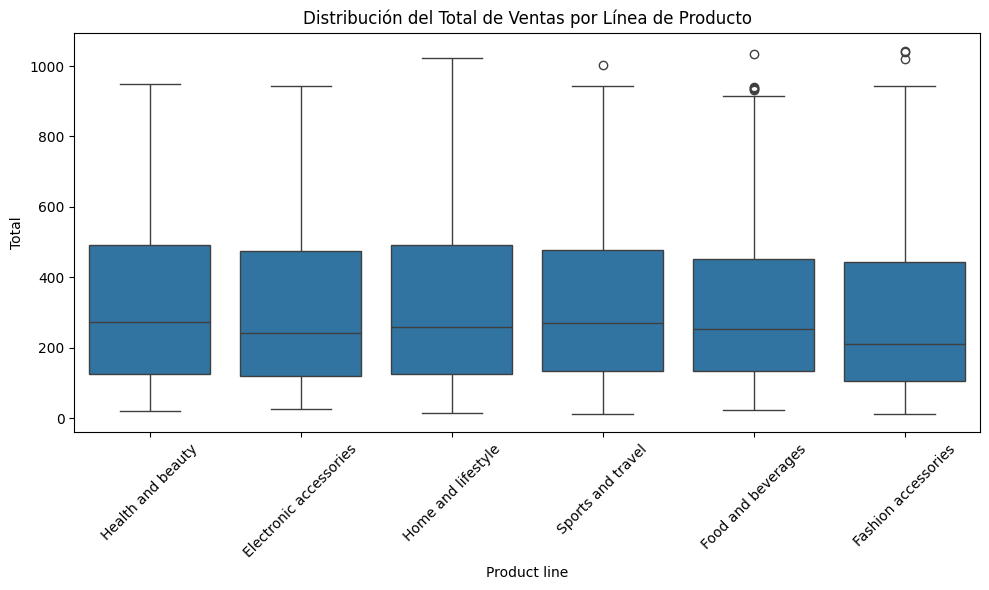

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Product line', y='Total')
plt.title('Distribución del Total de Ventas por Línea de Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Gráfico de dispersión: Precio unitario vs Total de venta (con color por género)
**Para qué sirve**: Sirve para explorar la relación entre el precio de los productos y el monto total de venta por transacción. Además, al distinguir por género, se pueden buscar patrones de consumo diferenciados.

**Qué muestra**
- Hay una leve relación positiva: productos con mayor precio unitario tienden a generar mayores totales, aunque hay mucha dispersión.

- No se observan diferencias claras por género en este gráfico, pero sí se ve que ambos participan en transacciones tanto pequeñas como grandes.

- La dispersión sugiere que el total de venta depende también de la cantidad comprada, no solo del precio unitario.

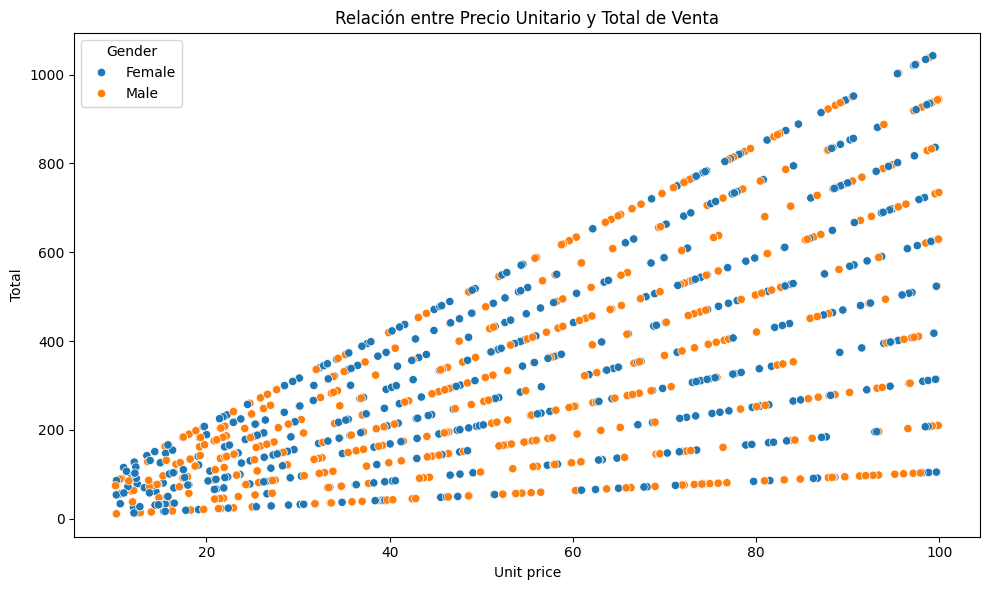

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Unit price', y='Total', hue='Gender')
plt.title('Relación entre Precio Unitario y Total de Venta')
plt.tight_layout()
plt.show()

## c. Discusión sobre los hallazgos
Hay variaciones claras por mes y producto: algunas líneas, como **“Electronic accessories”** o **“Food and beverages”**, presentan picos más marcados en ciertos meses.

En los box plots, líneas como **“Health and beauty”** tienen ventas más concentradas, mientras que otras tienen más dispersión.

El gráfico de dispersión sugiere una relación positiva moderada entre el precio unitario y el total de venta, lo que podría deberse a que se venden más unidades de productos de gama media.

# 3. Gráficos compuestos y contextualización

## a. Visualizaciones compuestas desarrolladas
Se desarrollarón cuatro visualizaciones que combinan múltiples variables para aportar una visión más profunda del comportamiento de los clientes y las ventas.

### 1. Gráfico de barras apiladas: Compras por género, tipo de producto, mes y método de pago
**Qué nos muestra**: Cantidad de compras realizadas por mujeres en cada categoría de producto, diferenciadas según el método de pago.

**Qué conclusión podemos obtener**: Permite identificar preferencias por método de pago según género. Por ejemplo, se puede ver si las mujeres tienden a usar más tarjeta de crédito en ciertas categorías o si prefieren efectivo en otras.

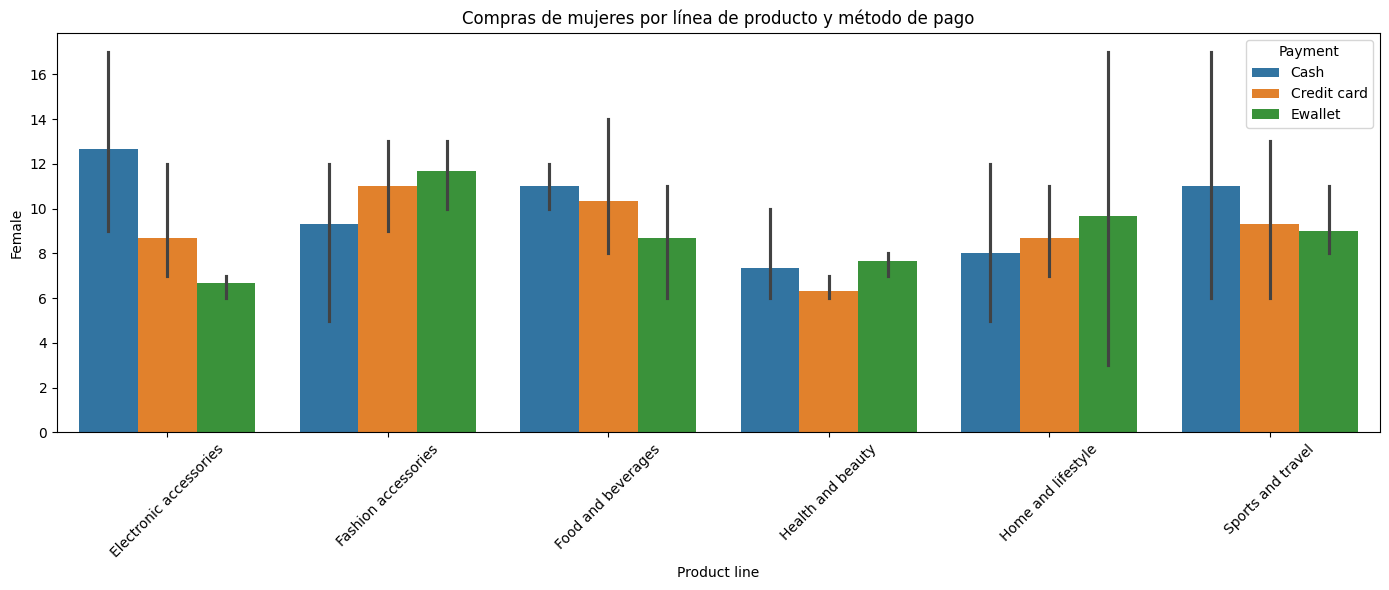

In [16]:
pivot_pago = pivot_pago.reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=pivot_pago, x='Product line', y='Female', hue='Payment')
plt.title("Compras de mujeres por línea de producto y método de pago")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. Gráfico de líneas: Evolución mensual de compras por género
**Qué nos muestra**: Cantidad de compras realizadas por género a lo largo de los meses.

**Qué conclusión podemos obtener**: Se observan posibles patrones estacionales o momentos en que un género compró más. Esto puede guiar decisiones sobre campañas segmentadas en ciertos periodos.

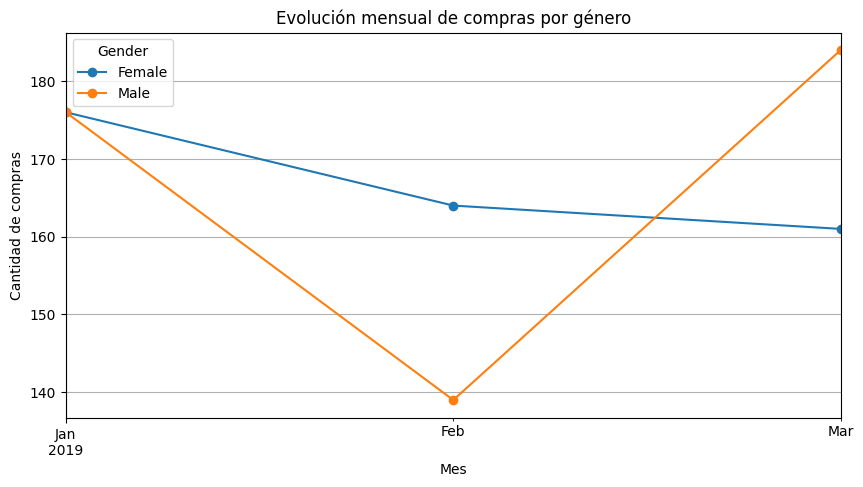

In [ ]:
pivot_by_month = pivot.groupby('Month')[['Female', 'Male']].sum()

pivot_by_month.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Evolución mensual de compras por género")
plt.ylabel("Cantidad de compras")
plt.xlabel("Mes")
plt.grid(True)
plt.show()

### 3. Gráfico de barras: Diferencia de compras entre géneros por producto
**Qué nos muestra**: La diferencia neta de compras entre mujeres y hombres por línea de producto.

**Qué conclusión podemos obtener**: Muestra con claridad qué productos son preferidos por cada género. **Barras positivas** indican mayor compra femenina; **Barras negativas**, masculina. Es útil para personalizar promociones por género.

C:\Users\nicol\AppData\Local\Temp\ipykernel_4656\1165024337.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pivot_diff, x='Product line', y='Diff_Female_Male', ci=None)


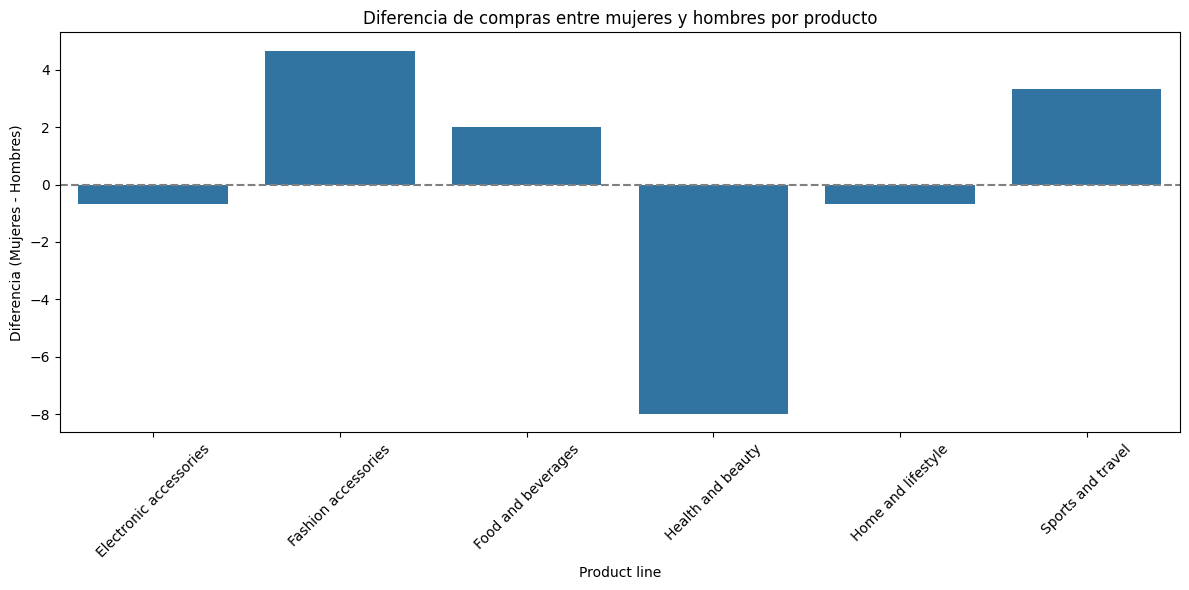

In [ ]:
pivot_diff = pivot.reset_index()[['Product line', 'Month', 'Diff_Female_Male']]

plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_diff, x='Product line', y='Diff_Female_Male', ci=None)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Diferencia de compras entre mujeres y hombres por producto")
plt.xticks(rotation=45)
plt.ylabel("Diferencia (Mujeres - Hombres)")
plt.tight_layout()
plt.show()

### 4. Heatmap: Diferencia de compras por producto y mes
**Qué nos muestra**: Muestra visualmente qué productos fueron más comprados por mujeres o hombres, mes a mes, usando una escala de colores.

**Qué conclusión podemos obtener**: Permite identificar no solo las diferencias de género, sino cuándo ocurren. Por ejemplo, un producto que usualmente compran más las mujeres puede ser preferido por hombres en un mes específico.

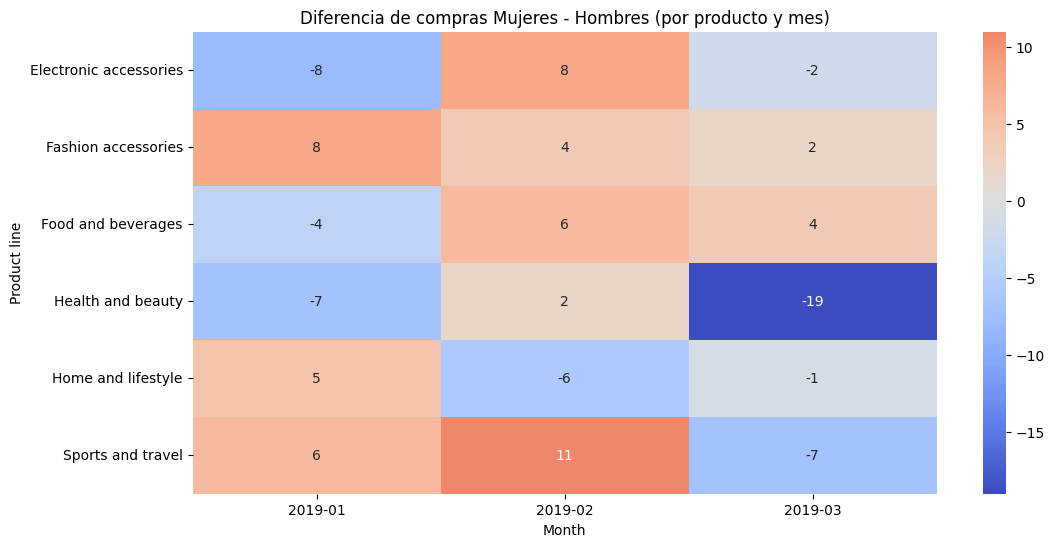

In [19]:
heatmap_data = pivot.reset_index().pivot(index='Product line', columns='Month', values='Diff_Female_Male')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
plt.title("Diferencia de compras Mujeres - Hombres (por producto y mes)")
plt.show()

## b. ¿Cómo estas visualizaciones ayudan a comprender mejor los datos?
Estas visualizaciones permiten:

- Cruzar múltiples dimensiones (producto, género, tiempo, forma de pago).

- Detectar comportamientos de compra diferenciados por segmento.

- Observar tendencias temporales, preferencias específicas y posibles cambios de comportamiento según el contexto.

Este nivel de análisis no sería visible con gráficos simples o unidimensionales.

## c. Justificación de elección
Se escogierón estas visualizaciones por su capacidad de:

- Simplificar la complejidad de los datos sin perder profundidad.

- Entregar insights valiosos de manera clara, visual y comparativa.

- Aportar valor a la toma de decisiones comerciales segmentadas por género, producto, tiempo o método de pago.

Además, estas combinaciones reflejan mejor el comportamiento real del cliente, que es multivariable, y no puede ser analizado eficazmente desde una sola dimensión.

# 4. Visualización de datos multivariados y de alta dimensionalidad: 

## a. Técnicas aplicadas

### 1. Heatmap de correlación entre variables numéricas
**Qué nos muestra**: Este heatmap muestra cómo se relacionan las variables cuantitativas entre sí: por ejemplo, si a mayor Quantity también sube el Total, o si Rating tiene relación con gross income.

**Conclusiones**: **PENDIENTE**

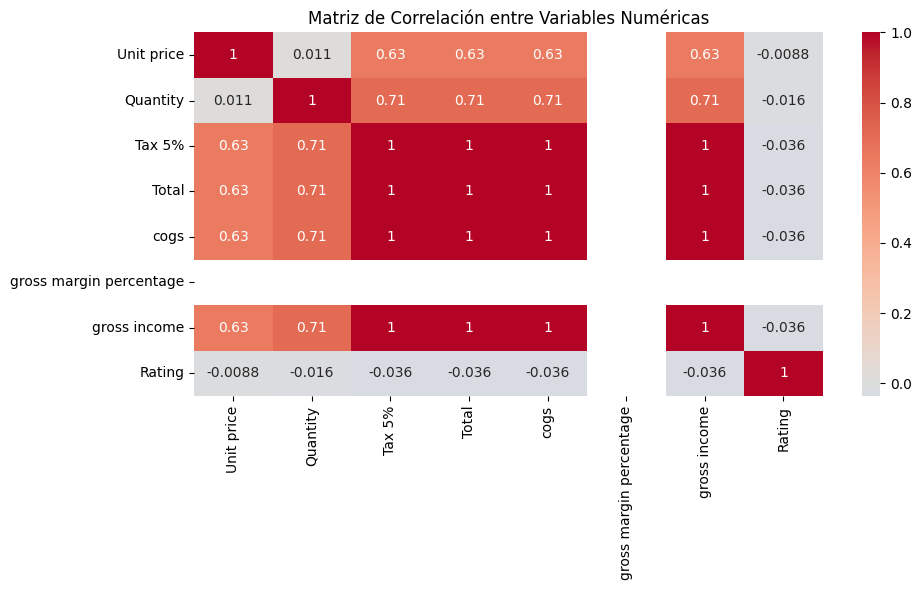

In [20]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

### 2. Pairplot (gráfico de dispersión múltiple por género)
**Qué nos muestra**: Este gráfico compara múltiples variables entre sí (todas vs todas), y además distingue por género, lo que permite ver diferencias en patrones de consumo según el sexo del cliente.

**Conclusiones**: **PENDIENTE**

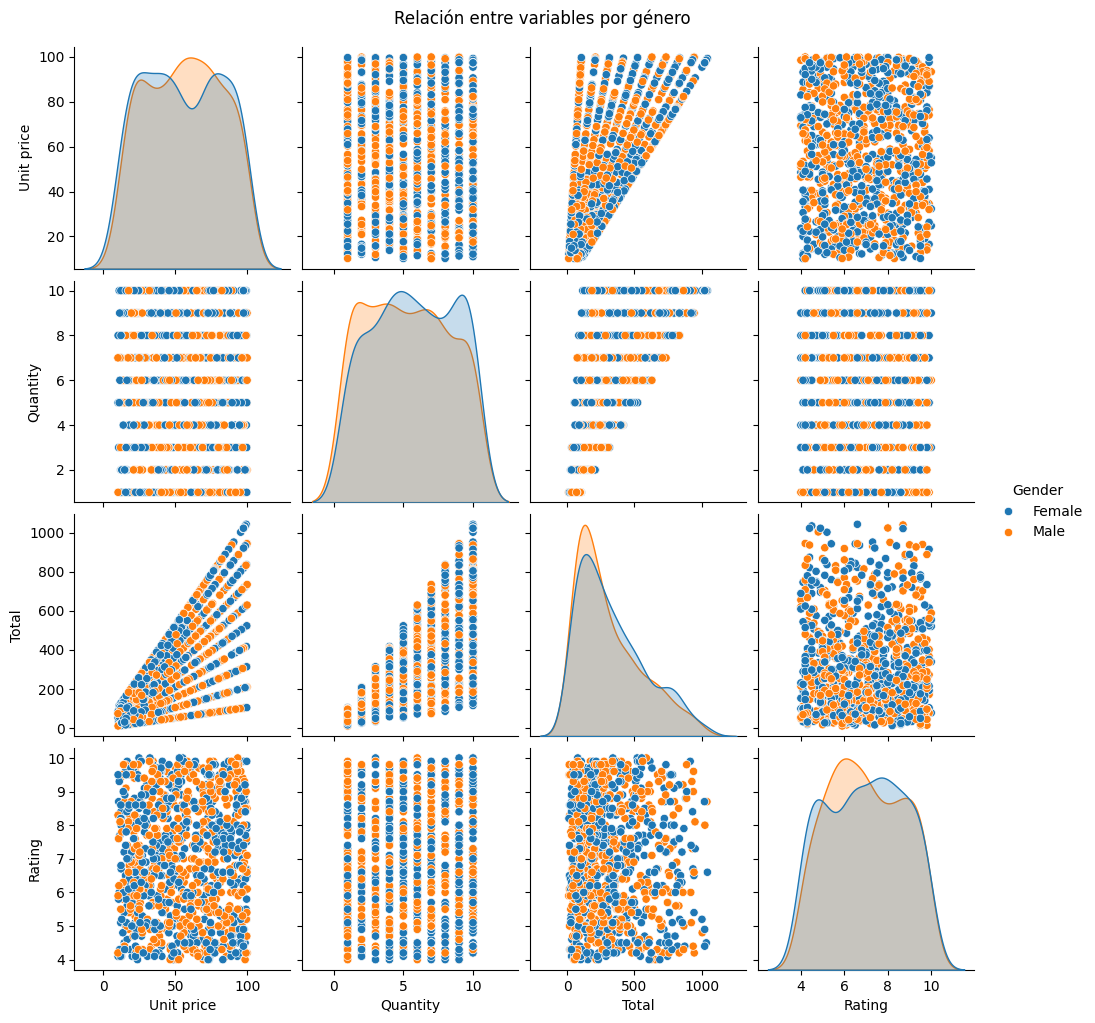

In [21]:
sns.pairplot(df[['Unit price', 'Quantity', 'Total', 'Rating', 'Gender']], hue='Gender')
plt.suptitle('Relación entre variables por género', y=1.02)
plt.show()

## b. Justificación de estas técnicas y su aporte
Estas técnicas se aplican cuando se quiere analizar relaciones entre múltiples variables simultáneamente, especialmente cuando:

- Se sospechan patrones complejos o no lineales.

- Se quiere ver si hay grupos o segmentos de clientes con características similares.

- Se necesita comparar más de dos dimensiones a la vez sin perder contexto.

¿Qué aportan al análisis?
- El heatmap de correlación permite entender cómo las variables están conectadas: por ejemplo, `Total` está altamente correlacionado con `Quantity` y `Unit price`, lo cual valida nuestras suposiciones sobre cómo se forma el ingreso(?).

- El pairplot es muy útil para descubrir agrupamientos o diferencias visuales entre géneros.



# 5. Visualización en 3D

## a. Elección de variables para la visualización tridimensional
...

## b. ¿Por qué usar una visualización 3D?
...

## c. Visualización 3D (usando Plotly)

### Unit price (precio unitario del producto), Quantity (cantidad de unidades compradas), y Total (monto total de la venta).

Utilidad??
- Podemos ver cómo varía el monto total de venta en función tanto del precio unitario como de la cantidad comprada.

- Podemos identificar agrupamientos o patrones de compra según los valores de estas tres variables, especialmente si lo combinamos con el color por Gender.

- Nos permite detectar `outliers` y relaciones no lineales más fácilmente.

In [39]:
fig = px.scatter_3d(
    df,
    x='Unit price',
    y='Quantity',
    z='Total',
    color='Gender',
    title='Visualización 3D: Precio Unitario vs Cantidad vs Total de Venta',
    opacity=0.7
)

fig.show()


### Color por mes (usando Month como categoría de color) (posible descarte...)
Podriamos ver:  
- Si en un mes específico aumentan las compras grandes (alta cantidad y total).

- Cambios en el tipo de productos preferidos (más caros o más baratos según el mes).

- Comportamientos de temporada (como mayor volumen en marzo, por ejemplo).

In [38]:
df['Month_str'] = df['Month'].astype(str)

fig = px.scatter_3d(
    df,
    x='Unit price',
    y='Quantity',
    z='Total',
    color='Month_str',
    title='3D: Precio vs Cantidad vs Total (coloreado por mes)',
    opacity=0.7
)

fig.show()


### Month + Total + Rating + Gender (color)
- Muestra - Cómo se distribuyen las ventas de diferentes líneas de productos en cantidad e ingreso, a lo largo de los meses.

- Utilidad? qué líneas de productos tienen más impacto económico en cada mes. 


In [35]:
df['Month_str'] = df['Month'].astype(str)

fig = px.scatter_3d(
    df,
    x='Total',
    y='Rating',
    z='gross income',
    color='Month_str',
    title='Total vs Rating vs Ganancia Bruta, coloreado por Mes',
    opacity=0.7
)

fig.show()


### Month + gross income + Quantity + Product line (color)
- Muestra: Cómo se distribuyen las ventas de diferentes líneas de productos en cantidad e ingreso, a lo largo de los meses.

- Utilidad? ver qué líneas de productos tienen más impacto económico en cada mes.

In [37]:
fig = px.scatter_3d(
    df,
    x='Month_str',
    y='gross income',
    z='Quantity',
    color='Product line',
    title='Ingreso Bruto vs Cantidad vs Mes, coloreado por línea de producto',
    opacity=0.7
)

fig.show()

### Month + Payment + Total
- Muestra: Qué métodos de pago generan más ingresos en cada mes.
    
- Utilidad??? Cómo cambian los ingresos según la forma de pago con el tiempo.


In [36]:
# Agrupar por mes y método de pago
pivot_payment_month = df.groupby(['Month_str', 'Payment']).agg({
    'Total': 'sum',
    'Quantity': 'sum',
    'gross income': 'sum'
}).reset_index()

fig = px.scatter_3d(
    pivot_payment_month,
    x='Month_str',
    y='Total',
    z='gross income',
    color='Payment',
    title='Total vs Ganancia Bruta por Mes y Método de Pago',
    opacity=0.8
)

fig.show()